## Isolation Forests

**Objectives**
- Describe the mechanism behind Isolation Forests
- Implement anomaly detection using Isolation Forests with Python and sklearn
- Define the contamination hyperparameter

**Isolation trees**

Isolation Forests offer an alternative and effective approach to anomaly detection. Unlike K-Means or PCA, which are distance-based methods, Isolation Forests use a tree-based strategy to isolate anomalies.

Isolations trees are unsupervised decision trees that keep dividing data until every data point has its own leaf. Due to how decision trees work, some data points will have a shorter 'path' between the origin node and the leaf for that data point.

Isolation trees work on the principle that anomalies are easier to "isolate" than normal points. In a decision tree, anomalies generally have shorter paths from the root node to a terminal node (leaf) because they are rare and different from the rest. The fewer the splits needed to isolate an observation, the more anomalous it is likely to be
**Isolation forests**

If you're familiar with Random Forests, understanding Isolation Forests becomes more intuitive. Just as Random Forests are ensembles of Decision Trees designed for classification or regression tasks, Isolation Forests are ensembles of Isolation Trees specifically built for anomaly detection.  An isolation forest averages the path lengths from the roots to the terminal nodes for each tree in the ensemble. Each data point is assigned an 'anomaly score' based on that average distance. Those data with the lowest anomaly score are identified as anomalies.

Main advantages of Isolation Forests:
- Efficiency: Work well with large datasets and high dimensions
- No assumptions about distribution: Does not assume any particular statistical distribution of the data
- Outlier ranking: Provides an anomaly score, allowing for ranking of anomalies



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest # new!
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
df = pd.read_csv("Data/artificial_kmeans_anomalies.csv")
df

,x1,x2,cluster,anomaly-kmeans
0,7.793419,-7.149916,1,0
1,8.783409,-9.979164,1,0
2,7.467731,1.424818,0,1
3,9.204612,-5.804796,2,0
4,10.242530,-3.605225,2,0
...,...,...,...,...
295,9.240416,-4.042842,2,0
296,6.688635,-8.782954,1,0
297,10.290780,-4.543033,2,0
298,9.131183,-5.351169,2,0


In [3]:
# Define the original features
X = df[['x1','x2']]
X.head()

,x1,x2
0,7.793419,-7.149916
1,8.783409,-9.979164
2,7.467731,1.424818
3,9.204612,-5.804796
4,10.242530,-3.605225


### Isolation Forest

When initializing the IsolationForest, there are several parameters to consider. The most important is the value of the contamination parameter.

**Contamination**

The contamination parameter in the Isolation Forest algorithm is a float value between 0 and 0.5, representing the proportion of anomalies in the dataset. It is used to set the threshold for marking data points as anomalies.

Essentially, it defines the proportion of outliers (anomalies) in the data set and is used to set the cut-off score for the anomaly detection.

For example, if contamination is set to 0.1, it means you expect 10% of your data points to be anomalies. The algorithm will set the threshold for marking anomalies so that 10% of the points will be flagged.

By setting the contamination parameter, you're essentially helping the algorithm calibrate its sensitivity to anomalies. A high value will make the algorithm more sensitive, flagging more points as anomalies, while a low value will make it less sensitive, flagging fewer points.

In [4]:
## Instantiate and fit the model
## To return the same number of anomalies as we found using the K-means method 
## with a threshold of 95%, we will set our contamination value to 0.05. 

# Instantiate the model with a contaimination of 0.05
iso_05 = IsolationForest(contamination=0.05, random_state = 42)
# fit the model using .values to avoid a warning
iso_05.fit(X.values)

IsolationForest(contamination=0.05, random_state=42)

In [5]:
# Obtain results from the model
predictions = iso_05.predict(X.values)
predictions[:100]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1])

- Notice that IsolationForest uses a different coding for anomalies than what we currently have in our original dataframe for the anomalies predicted with Kmeans. While not necessary, we will change the labels to match for consistency.

In [6]:
# Change the labels to match our columns from the kmeans dataframe
# Not anamolies
predictions[predictions ==1] = 0
# Anomalies
predictions[predictions ==-1] = 1
# Preview new labels
predictions[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [7]:
# Add isolation forest predictions to the dataframe
df['anomaly-iso_05'] = predictions
# Preview dataframe with new column
df.head()

,x1,x2,cluster,anomaly-kmeans,anomaly-iso_05
0,7.793419,-7.149916,1,0,0
1,8.783409,-9.979164,1,0,0
2,7.467731,1.424818,0,1,0
3,9.204612,-5.804796,2,0,0
4,10.242530,-3.605225,2,0,0


Even from the first 5 results (see index 2), we can see that the two methods did not identify the same points as anomalous. We did, however, expect each approach to identify the same number of anomalies. In this case, 5% of 300. Let's check to see how many anomalies were detected.

In [8]:
# Comparing number of anomalies found
kmeans_anomalies = df['anomaly-kmeans'].sum()
print(f'Kmeans (threshold = 0.95) identified {kmeans_anomalies} anomalies.')
isoforest_anomalies = df['anomaly-iso_05'].sum()
print(f'Isoforest (contaminatin = 0.05) identified {isoforest_anomalies} anomalies.')

Kmeans (threshold = 0.95) identified 15 anomalies.
Isoforest (contaminatin = 0.05) identified 15 anomalies.


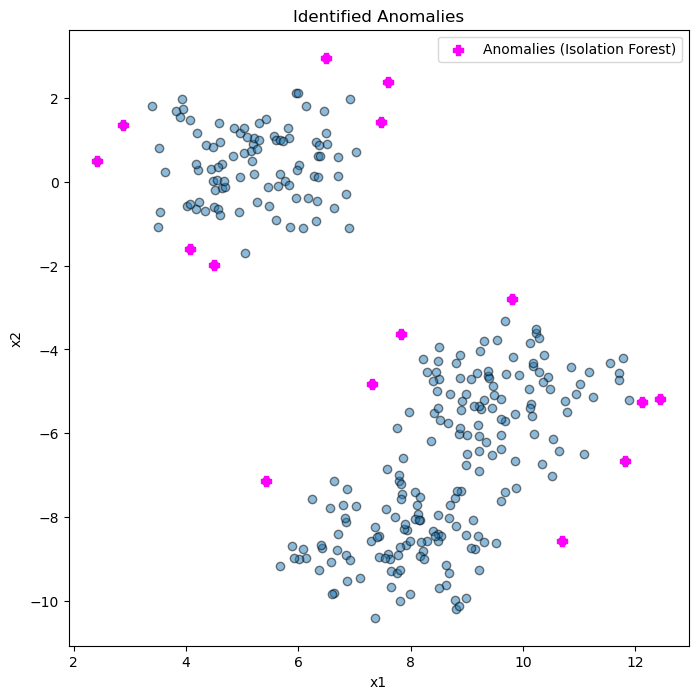

In [10]:
# With only two features, this data can be visualized

# Plot the original data points
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df['x1'], df['x2'], ec= 'black', alpha = 0.5)
ax.set_title("Identified Anomalies")  
    
# Plot the anomalies identified by the isolation forest
df.loc[df['anomaly-kmeans'] == 1].plot(
    x="x1", y="x2", kind="scatter", color="magenta", label="Anomalies (Isolation Forest)", 
    ax=ax, marker='P', s=50);

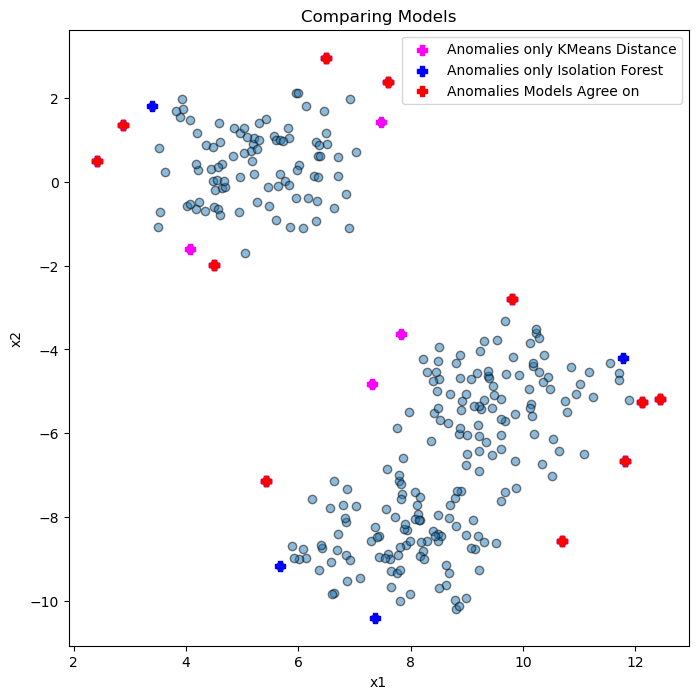

In [12]:
# For comparison, we will plot the anomalies identified by one or both methods.

# Define anomalies identified by kmeans
kmeans_95_anomalies = df[df['anomaly-kmeans'] == 1]
# Define anomalies identified by isolation forest
iso_05_anomalies = df[df['anomaly-iso_05'] == 1]
# Define anomalies identified by both models
both_anomalies = df[(df['anomaly-iso_05'] == 1)& (df['anomaly-kmeans'] == 1)]

# Plot the data points and identified clusters
fig, ax= plt.subplots(figsize=(8, 8))
# Plot data
ax.scatter(df["x1"], df["x2"], ec = 'black', alpha=0.5)
ax.set_title("Comparing Models")

# Annotate KMeans anomalies
kmeans_95_anomalies.plot(x="x1", y="x2", kind="scatter", color="magenta", label="Anomalies only KMeans Distance", ax=ax, marker='P',s=50)
# Annotate Iso Forest anomalies
iso_05_anomalies.plot(x="x1", y="x2", kind="scatter", color="blue", label="Anomalies only Isolation Forest", ax=ax, marker='P',s=50)
# Annotate Anomolies identified by both models
both_anomalies.plot(x="x1", y="x2", kind="scatter", color="red", label="Anomalies Models Agree on", ax=ax, marker='P',s=50);

The Isolation Forest flagged many data points as anomalous that are closer to cluster centers than the KMeans tended to. Remember that Isolation Forests do not consider cluster centers when detecting anomalies since they are tree-based.

**Change Contamination Parameter**

We started with a contamination value of 0.05, which identified 5% (or 15 of 300) data points as anomalous. Let's try another isolation forest with a higher contamination value and compare the results. We will drastically increase the number of anomalies by using a contamination value of .20. We expect 20% of our values to be identified as anomalous.


In [13]:
# Instantiate the model with a contaimination of 0.20 (we will identify 20% as anamolous)
iso_20 = IsolationForest(contamination=0.20, random_state = 42)
# fit the model using .values to avoid a warning
iso_20.fit(X.values)
# Obtain results from the model
predictions = iso_20.predict(X.values)
predictions[:100]

array([ 1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1])

In [14]:
# Change the labels to match our columns from the kmeans dataframe
# Not anamolies
predictions[predictions ==1] = 0
# Anomalies
predictions[predictions ==-1] = 1
# Add isolation forest predictions to the dataframe
df['anomaly-iso_20'] = predictions
# Preview dataframe with new column
df.head()

,x1,x2,cluster,anomaly-kmeans,anomaly-iso_05,anomaly-iso_20
0,7.793419,-7.149916,1,0,0,0
1,8.783409,-9.979164,1,0,0,1
2,7.467731,1.424818,0,1,0,1
3,9.204612,-5.804796,2,0,0,0
4,10.242530,-3.605225,2,0,0,0


In [15]:
# Comparing number of anomalies found with different contamination values
isoforest_anomalies_05 = df['anomaly-iso_05'].sum()
print(f'Isoforest (contaminatin = 0.05) identified {isoforest_anomalies_05} anomalies.')
isoforest_anomalies_20 = df['anomaly-iso_20'].sum()
print(f'Isoforest (contaminatin = 0.20) identified {isoforest_anomalies_20} anomalies.')

Isoforest (contaminatin = 0.05) identified 15 anomalies.
Isoforest (contaminatin = 0.20) identified 60 anomalies.


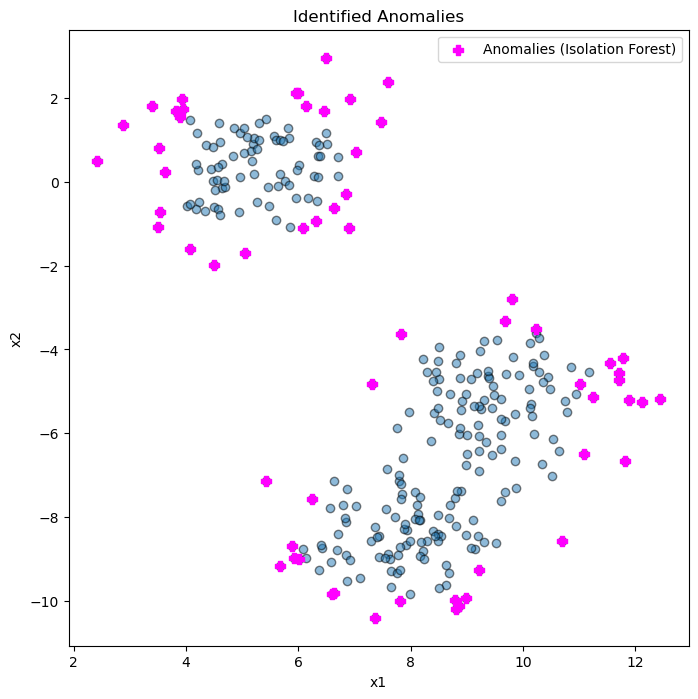

In [16]:
# Create a filter to identify anomalies
idx_anomalies = df[df['anomaly-iso_20'] == 1].index
idx_anomalies
# Plot the original data points
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df['x1'], df['x2'], ec= 'black', alpha = 0.5)
ax.set_title("Identified Anomalies")  
    
# Plot the anomalies identified by the isolation forest
df.loc[idx_anomalies].plot(
    x="x1", y="x2", kind="scatter", color="magenta", label="Anomalies (Isolation Forest)", 
    ax=ax, marker='P', s=50);

#### Summary

In this lesson, you learned about anomaly detection using Isolation Forests. These are ensemble models made up of isolation trees. They detect anomalous data by fitting on the data and identifying the data points that can be assigned to a leaf node in the fewest number of splits.

You learned that you can adjust the number of anomalies that the model predicts using the 'contamination' hyperparameter. The 'contamination' determines the percentage of the data that will be flagged as anomalous and should be set using prior experience, business knowledge, or careful examination of the data. In the next lesson, we will explore anomaly scores.